# Predicting Wine Quality with Bagging

In [14]:
import numpy as np
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor
import random
from math import sqrt
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

In [15]:
# read data into iterable
x_list = []
labels = []
names = []
first_line = True
data_path = './data/winequality-red.csv'

with open(data_path) as data:
    
    for line in data:
        
        if first_line:
            names = line.strip().split(';')
            first_line = False
            
        else:
            # split on semicolon
            row = line.strip().split(';')
            
            # put labels in separate array
            labels.append(float(row[-1]))
            
            # remove label from row
            row.pop()
            
            # convert row to floats
            float_row = [float(num) for num in row]
            x_list.append(float_row)
            
n_rows = len(x_list)
n_cols = len(x_list[0])

In [16]:
# take fixed test set 30% of sample
random.seed(1)
n_sample = int(n_rows * 0.30)
idx_test = random.sample(range(n_rows), n_sample)
idx_test.sort()
idx_train = [idx for idx in range(n_rows) if not (idx in idx_test)]

# define test and training attribute and label sets
x_train = [x_list[r] for r in idx_train]
x_test = [x_list[r] for r in idx_test]
y_train = [labels[r] for r in idx_train]
y_test = [labels[r] for r in idx_test]

In [18]:
# train a series of models on random subsets of the training data
# collect the models in a list and chek error of composite as list grows

# maximum number of models to generate
num_trees_max = 30

# tree depth - typically at the high end
tree_depth = 1

# initialize a list to hold models
model_list = []
pred_list = []

# number of samples to draw for stochastic bagging
n_bag_samples = int(len(x_train) * 0.5)

for i_trees in range(num_trees_max):
    idx_bag = []
    
    for i in range(n_bag_samples):
        idx_bag.append(random.choice(range(len(x_train))))
        
    x_train_bag = [x_train[i] for i in idx_bag]
    y_train_bag = [y_train[i] for i in idx_bag]
    
    model_list.append(DecisionTreeRegressor(max_depth=tree_depth))
    model_list[-1].fit(x_train_bag, y_train_bag)
    
    # make prediction with latest model and add to list of predictions
    latest_prediction = model_list[-1].predict(x_test)
    pred_list.append(list(latest_prediction))

In [19]:
# build cumulative prediction from first 'n' models
mse = []
all_predictions = []

for i_models in range(len(model_list)):
    
    # average first 'i_models' of the predictions
    prediction = []
    
    for i_pred in range(len(x_test)):
        prediction.append(sum([pred_list[i][i_pred] for i in range(i_models + 1)])/(i_models + 1))
        
    all_predictions.append(prediction)
    errors = [(y_test[i] - prediction[i]) for i in range(len(y_test))]
    mse.append(sum([e ** 2 for e in errors])/len(y_test))
    
n_models = [i + 1 for i in range(len(model_list))]

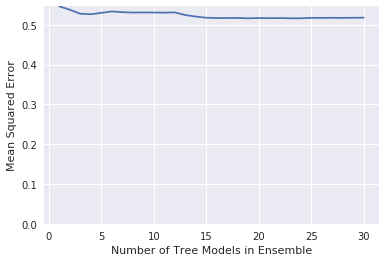

In [20]:
plt.plot(n_models, mse)
plt.axis('tight')
plt.xlabel('Number of Tree Models in Ensemble')
plt.ylabel('Mean Squared Error')
plt.ylim((0.0, max(mse)))
plt.show()

In [21]:
print(f'Minimum MSE: {min(mse)}')

Minimum MSE: 0.5164762448403564
